In [78]:
! pip install -U scikit-learn
! pip install matplotlib
! pip install pandas
! pip install numpy
! pip install scikit-plot
! pip install scipy==1.11.4

In [89]:
import pickle
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scikitplot as skplt
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

## Load in Data

### TF-IDF

In [80]:
with open('/Users/shreyanakum/Documents/CS178/CS-178-Project/DATA/tfidf_data.pkl', 'rb') as f:
    tfidf_data = pickle.load(f)

X_train_tfidf = tfidf_data['X_train']
X_test_tfidf = tfidf_data['X_test']
y_train_tfidf = tfidf_data['y_train']
y_test_tfidf = tfidf_data['y_test']
vectorizer_tfidf = tfidf_data['vectorizer']

### Count Vectorizer

In [81]:
with open('/Users/shreyanakum/Documents/CS178/CS-178-Project/DATA/count_data.pkl', 'rb') as f:
    count_data = pickle.load(f)

X_train_count = count_data['X_train']
X_test_count = count_data['X_test']
y_train_count = count_data['y_train']
y_test_count = count_data['y_test']
vectorizer_count = count_data['vectorizer']

In [82]:
classes = ['toxic', 'severe_toxic', 'insult', 'threat', 'obscene', 'identity_hate']

### TFIDF only because percepton revealed that is the best one

In [ ]:
param_grid = {
    # 'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [10, 15, 20, 25, None],
    'min_samples_leaf': [2, 5, 10],
    'min_samples_split': [2, 5, 10],
}


dt_base = DecisionTreeClassifier(random_state=42)

In [ ]:
grid_search = GridSearchCV(
    estimator=dt_base,
    param_grid=param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(tfidf_data['X_train'], tfidf_data['y_train'])

print("Best hyperparameters from Grid Search:")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation F1 score: {grid_search.best_score_}")

best_dt = grid_search.best_estimator_

# cv scores on training data
print('\n')
print("Cross validation scores (5-fold)")
cv_scores = cross_val_score(best_dt, tfidf_data['X_train'], tfidf_data['y_train'], cv=5, scoring='f1_weighted')
print(f"CV F1 Scores: {cv_scores}")
print(f"Mean CV F1 Score: {cv_scores.mean()} (+/- {cv_scores.std() * 2})")

y_pred = best_dt.predict(tfidf_data['X_test'])

test_f1 = f1_score(tfidf_data['y_test'], y_pred, average='weighted')
print("Test set performance")
print(f"Test Set Weighted F1 Score: {test_f1}")

test_accuracy_sc = accuracy_score(tfidf_data['y_test'], y_pred)
print(f"Test Set Accuracy Score: {test_accuracy_sc}")

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2; total time=   9.8s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2; total time=  10.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2; total time=  13.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5; total time=  13.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5; total time=  13.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5; total time=  13.5s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2; total time=  14.0s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2; total time=  14.0s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5; total time=  10.7s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5; total time=  10.8s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10; total time=  11.6s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10; total time=  11.6s
[C


Classification report:
              precision    recall  f1-score   support

           0       0.77      0.61      0.69      3056
           1       0.40      0.16      0.23       321
           2       0.84      0.70      0.76      1715
           3       0.33      0.07      0.11        74
           4       0.69      0.54      0.61      1614
           5       0.52      0.15      0.24       294

   micro avg       0.76      0.57      0.65      7074
   macro avg       0.59      0.37      0.44      7074
weighted avg       0.74      0.57      0.64      7074
 samples avg       0.05      0.05      0.05      7074


Aggregate Confusion Matrix (all labels combined):
[[183131   1285]
 [  3030   4044]]


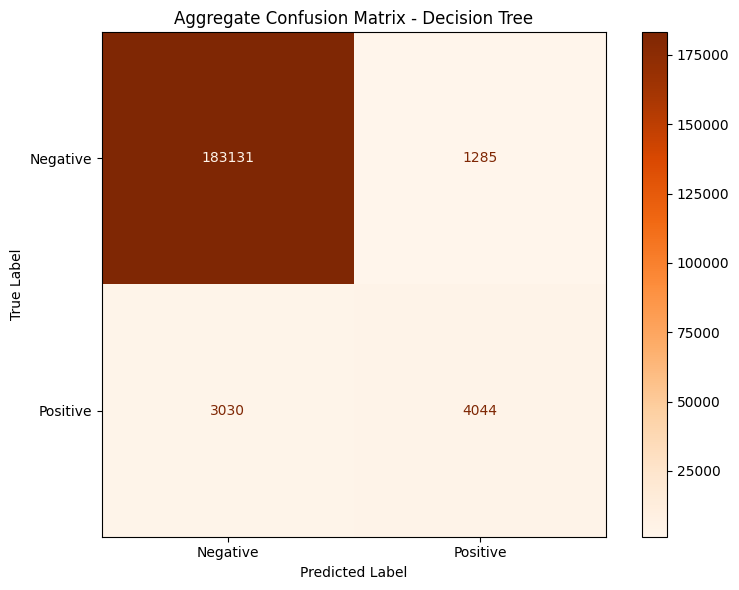

In [ ]:
print('\nClassification report:')
print(classification_report(tfidf_data['y_test'], y_pred, zero_division=0))

y_true_flat = tfidf_data['y_test'].values.ravel()
y_pred_flat = y_pred.ravel()

cm = confusion_matrix(y_true_flat, y_pred_flat, labels=[0, 1])
print("\nAggregate Confusion Matrix")
print(cm)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(ax=ax, cmap='Oranges', values_format='d')
plt.title('Confusion Matrix: Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()